In [22]:
import numpy as np
from matplotlib import pyplot as plt

nt = 1000
nxy = 100
n_per_t = 50
D = 0.01
cell_num = 20
dt = 0.1
tau = 200
# phi_av = 0.5
gamma = 0.01

x_lim = [-1,1]
y_lim = [-1,5]

x_space = np.linspace(x_lim[0],x_lim[1],nxy)
y_space = np.linspace(y_lim[0],y_lim[1],nxy)

# cells_x = np.linspace(x_lim[0],x_lim[1],cell_num)        
# diff_x = np.diff(cells_x)[0]

# cells_y = np.linspace(y_lim[0],y_lim[1],cell_num)        
# diff_y = np.diff(cells_y)[0]

# sum_phi = np.zeros((cells_x.size,cells_y.size,nt))
# count = np.zeros((cells_x.size,cells_y.size,nt))

def step(x,y,u,v):
    u += -gamma*u*dt+np.sqrt(2*D)*np.random.normal()*np.sqrt(dt)
    v += -gamma*u*dt+np.sqrt(2*D)*np.random.normal()*np.sqrt(dt)

    x += u*dt
    y += v*dt
#     phi = 1
#     phi = (phi_av + phi*(dt*tau-1))/(dt*tau)

    condition = False
    if x > x_lim[1]:
        condition = True
    elif x < x_lim[0]:
        condition = True

    if y > y_lim[1]:
        condition = True
    elif y < y_lim[0]:
        condition = True

    return x,y,u,v,condition

    
particles = []

x_0 = sum(x_lim)/2
y_0 = y_lim[0]
u_0 = 0
v_0 = 1

all_particles = []

for t in range(nt):
    new_particles = []
    # Initialise new particles
    for n_new in range(n_per_t):
        particles.append([x_0,y_0,u_0,v_0])
    for i in range(len(particles)):
        x,y,u,v,condition = step(*particles[i])
        if not condition:
            new_particles.append([x,y,u,v])
    particles = new_particles
    all_particles.append(particles)
        
# for i in range(n_samples):
#     x_0 = np.random.choice(x_space)
#     y_0 = np.random.choice(y_space)
#     x_t = 0
#     y_t = -1
#     u_t = 0
#     v_t = v_0
#     phi_t = 1
    
#     condition = False
#     x_y_phi_t = []

#     for j in range(nt):
#         x_y_phi_t.append([x_t,y_t,phi_t])
#         if not condition:
#             index_x = int(np.floor(x_t/diff_x) + (cell_num)/2)
#             index_y = int(np.floor(y_t/diff_y) + (cell_num)/2)
#             count[index_x,index_y,j] += 1
#             sum_phi[index_x,index_y,j] += phi_t

#         x_t,y_t,phi_t,condition = step(x_t,y_t,u_t,v_t)
        
#     particles.append(x_y_phi_t)
    

# particles_array = np.array(particles)

# particles_array = particles_array.transpose(1,0,2)

# all_cell_colours = sum_phi/count
print(all_particles)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



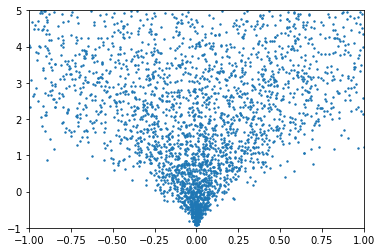

In [23]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig = plt.figure()
ax = plt.axes(xlim=(x_lim[0], x_lim[1]),ylim=(y_lim[0],y_lim[1]))
scatter = ax.scatter(all_particles[0][:][0], all_particles[0][:][1],s=2)
def update(frame):
    scatter.set_offsets(np.array(all_particles[frame])[:,0:2])
    return scatter,

ani = FuncAnimation(fig, update, frames=range(1,len(all_particles)), blit=True)
ani.save('diffusing_particles_mixing.gif')